<a href="https://colab.research.google.com/github/M-H-Amini/MLFun/blob/master/MNIST_AE_DimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  MNIST Dimensionality Reduction Using Auto-Encoders

In this tiny project, I'm gonna train an Auto-Encoder on MNIST and use its latent space to perform dimensionality reduction on MNIST.

In [56]:
from tensorflow.keras.layers import Dense, InputLayer, Conv2D, MaxPool2D, Flatten, Reshape
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.datasets.mnist import load_data
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import matplotlib.patches as mpatches
import numpy as np

#  Multi-Layer Perceptron
First, let's use a simple MLP-based Auto-Encoder for this task.

##  Dataset Preparation
In this stage, we would flatten each image to be able to fed into MLP.

In [47]:
(Xtrain, ytrain), (Xtest, ytest) = load_data()
Xtrain, Xtest = Xtrain / 255., Xtest / 255.
print(Xtrain.shape, Xtest.shape)
Xtrain = Xtrain.reshape((len(Xtrain), -1))
Xtest = Xtest.reshape((len(Xtest), -1))
print(Xtrain.shape, Xtest.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 784) (10000, 784)


##  Model

In [44]:
def createModel(layer_nodes, latent_layer_index):
  model = Sequential()
  model.add(InputLayer((784,)))
  for node_no in layer_nodes:
    model.add(Dense(node_no, activation='elu'))
  model.add(Dense(784, 'sigmoid'))
  model.compile(optimizer='adam', loss='mse')
  
  model_latent = Model(inputs=[model.input], outputs=[model.layers[latent_layer_index].output])
  return model, model_latent

##  Initializint autoEncoder...
model, model_latent = createModel((32, 8, 2, 8, 32), 2)

##  Training autoencoder...
model.fit(Xtrain, Xtrain, epochs=50, batch_size=32, validation_data=(Xtest, Xtest))

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0637 - val_loss: 0.0590
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0582 - val_loss: 0.0568
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0560 - val_loss: 0.0553
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0548 - val_loss: 0.0541
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0537 - val_loss: 0.0532
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0529 - val_loss: 0.0527
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0525 - val_loss: 0.0523
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0522 - val_loss: 0.0521
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0519 - val_loss: 0.0517
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.051

Now let's generate latent space dimensionality-reduced dataset.

In [48]:
Xtrain_latent = model_latent(Xtrain)
print(Xtrain_latent.shape)

(60000, 2)


##  Visualization
Now let's visualize the latent space results for each class

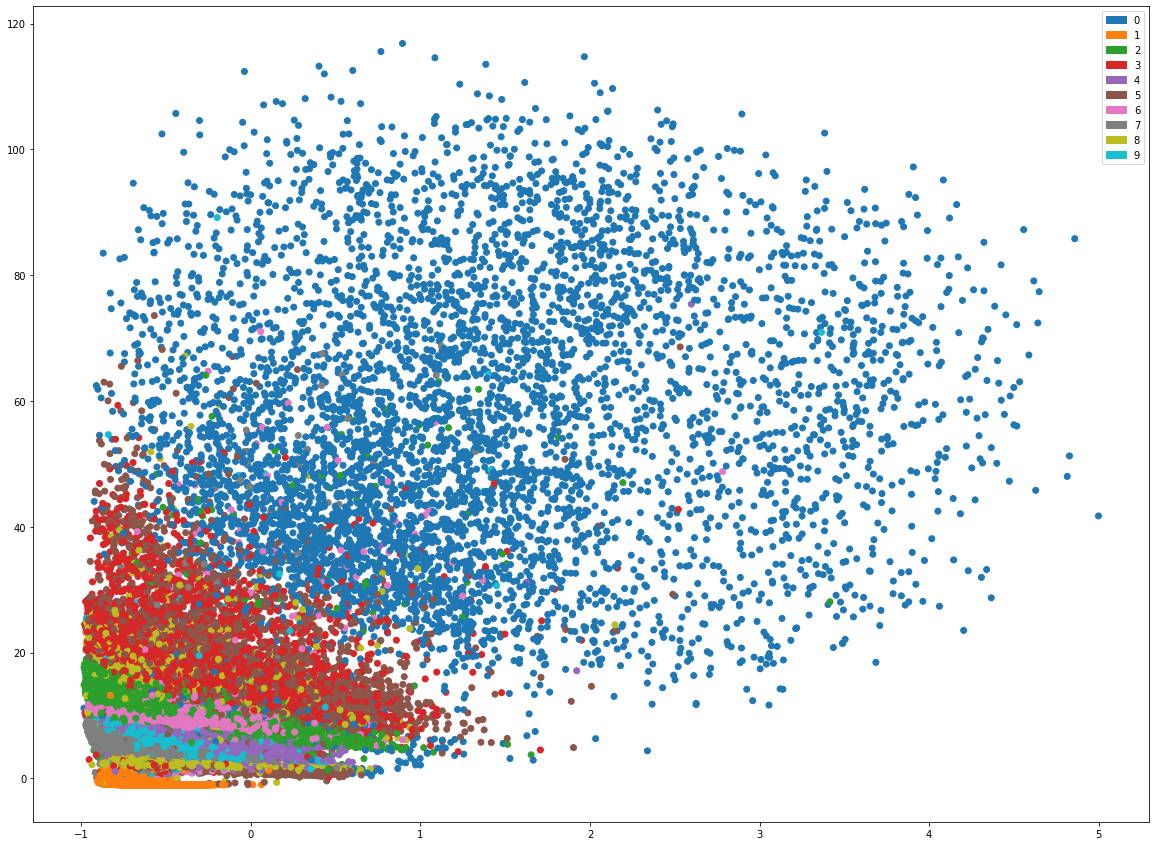

In [49]:
colors = list(mcolors.TABLEAU_COLORS)

patches = [mpatches.Patch(color=colors[i], label=f'{i}') for i in range(10)]
plt.figure(figsize=(20, 15))
plt.scatter(Xtrain_latent[:, 0], Xtrain_latent[:, 1], color=[colors[ytrain[i]] for i in range(len(ytrain))], marker='o', label=[str(ytrain[i]) for i in range(len(ytrain))])
plt.legend(handles=patches)
plt.show()

#  CNN

Now let's do the same task using Convolutional Neural Networks. I would use a simple CNN here as the encoder part and a simple MLP as the decoder part.

##  Dataset Preparation
In this stage, we would add an extra dimension to the dataset since the convolutional layer in tensorflow expects a 3D array as the input (without considering batch dimension)

In [65]:
(Xtrain, ytrain), (Xtest, ytest) = load_data()
Xtrain, Xtest = Xtrain / 255., Xtest / 255.
print(Xtrain.shape, Xtest.shape)
Xtrain = Xtrain[..., np.newaxis]
Xtest = Xtest[..., np.newaxis]
print(Xtrain.shape, Xtest.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


##  Model

In [69]:
model = Sequential()
model.add(InputLayer((28, 28, 1)))
model.add(Conv2D(64, 3, padding='same', activation='elu'))
model.add(MaxPool2D())
model.add(Conv2D(32, 3, padding='same', activation='elu'))
model.add(MaxPool2D())
model.add(Conv2D(16, 3, padding='same', activation='elu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(2, 'elu'))
model.add(Dense(16, 'elu'))
model.add(Dense(64, 'elu'))
model.add(Dense(784, 'sigmoid'))
model.add(Reshape((28, 28, 1)))
model.compile(optimizer='adam', loss='mse')

model_latent = Model(inputs=[model.input], outputs=[model.layers[7].output])

In [70]:
##  Training autoencoder...
model.fit(Xtrain, Xtrain, epochs=20, batch_size=32, validation_data=(Xtest, Xtest))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0574 - val_loss: 0.0521
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0503 - val_loss: 0.0490
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0484 - val_loss: 0.0477
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0475 - val_loss: 0.0472
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0468 - val_loss: 0.0464
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0461 - val_loss: 0.0460
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0456 - val_loss: 0.0453
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0451 - val_loss: 0.0450
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0447 - val_loss: 0.0452
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.044

Now let's generate latent space dimensionality-reduced dataset.

In [74]:
N = 10000
Xtrain_latent = model_latent(Xtrain[:N])
print(Xtrain_latent.shape)

(10000, 2)


##  Visualization
Now let's visualize the latent space results for each class

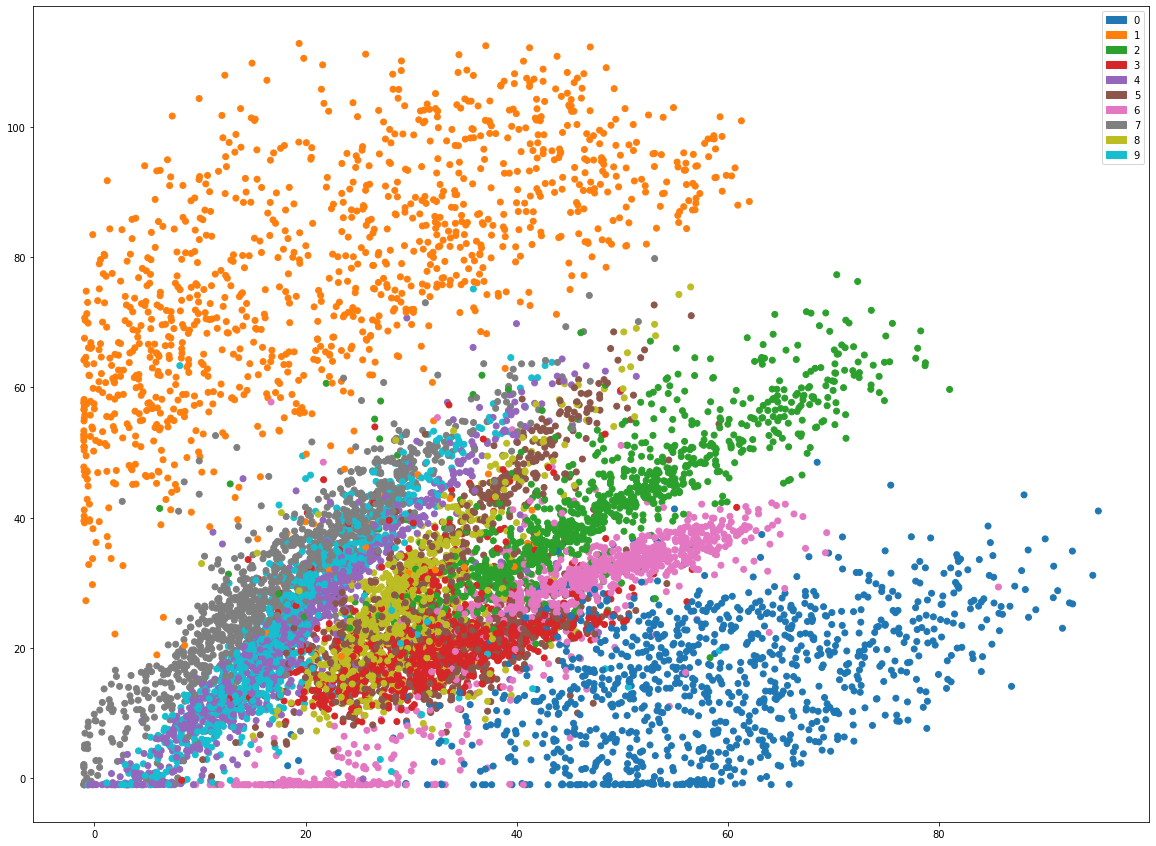

In [75]:
colors = list(mcolors.TABLEAU_COLORS)

patches = [mpatches.Patch(color=colors[i], label=f'{i}') for i in range(10)]
plt.figure(figsize=(20, 15))
plt.scatter(Xtrain_latent[:, 0], Xtrain_latent[:, 1], color=[colors[ytrain[i]] for i in range(N)], marker='o', label=[str(ytrain[i]) for i in range(N)])
plt.legend(handles=patches)
plt.show()